In [28]:
import os

import torch
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import DataLoader
from utils.ch_tokenizer import CharTokenizer
from datasets.text_dataset import TextDataset
from models.transformerLM import TransformerLanguageModel
from config import CHECKPOINT_PATH, TXT_FILE_PATH, SEQ_LEN, MODEL_CONFIG

In [29]:
checkpoint_path = CHECKPOINT_PATH
txt_file_path = TXT_FILE_PATH

tokenizer = CharTokenizer(txt_file_path)
vocab_size = tokenizer.vocab_size

seq_len = SEQ_LEN
embed_dim = MODEL_CONFIG['embed_dim']
num_heads = MODEL_CONFIG['num_heads']
hidden_dim = MODEL_CONFIG['hidden_dim']
enc_ffn_h_dim = MODEL_CONFIG['enc_ffn_h_dim']
num_enc = MODEL_CONFIG['num_enc']
use_sinusoidal = MODEL_CONFIG['use_sinusoidal']

device = ('cuda' if torch.cuda.is_available() else 'cpu')

model = TransformerLanguageModel(vocab_size, embed_dim, seq_len, hidden_dim, num_heads, enc_ffn_h_dim, num_enc, use_sinusoidal).to(device)

model.load_state_dict(torch.load(checkpoint_path))

<All keys matched successfully>

Visualize Training Loss and Validation Loss over the Epochs

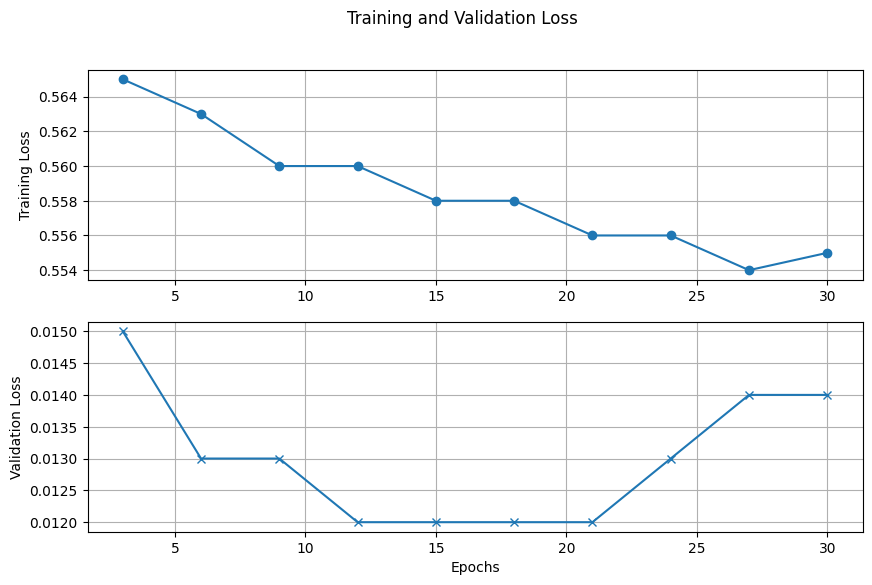

In [51]:
training_info_path = os.path.relpath(os.path.join(os.path.dirname(CHECKPOINT_PATH), 'training_info.txt'))

epochs = []
train_loss = []
val_loss = []

with open(training_info_path, 'r') as file:
    for line in file:
        if "epoch" and "training_loss" in line:
            epochs.append(int(line.split()[0]))
            train_loss.append(round(float(line.split()[-1]),3))
        elif "epoch" and "val_loss" in line:
            val_loss.append(round(float(line.split()[-1]),3))

plt.figure(figsize=(10, 6))
plt.suptitle('Training and Validation Loss')

plt.subplot(2, 1, 1)
plt.plot(epochs, train_loss, marker='o')
plt.ylabel('Training Loss')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(epochs, val_loss, marker='x')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.grid(True)

plt.show()